In [23]:
%load_ext autoreload
%autoreload 2
%run autoenc_br.py --epochs 2 --connected_components 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Batch 1, loss 1.0805082321166992
Batch 101, loss 0.3656888179259725
Batch 201, loss 0.21408842730136654
Batch 301, loss 0.16016608794711754
Batch 401, loss 0.13220856437213402
Batch 501, loss 0.11487666133069944
Batch 601, loss 0.10303561654121626
Batch 701, loss 0.09436453569058685
Batch 801, loss 0.08777171334300594
Batch 901, loss 0.0825495925896308
Batch 1001, loss 0.0782810509182535
Batch 1101, loss 0.07474845305058114
Batch 1201, loss 0.07174905111934124
Batch 1301, loss 0.0692018003880886
Batch 1401, loss 0.06697593936743182
Batch 1501, loss 0.0650238393272939
Batch 1601, loss 0.06329416410810199
Batch 1701, loss 0.06175410435444674
Batch 1801, loss 0.06035156604492088
Train epoch 1, loss 0.05941028027733167
Batch 1, loss 0.03700587898492813
Batch 101, loss 0.03621595522554794
Batch 201, loss 0.03614449651161237
Batch 301, loss 0.03598164966286615
Batch 401, loss 0.03588485320161405
Batch 501

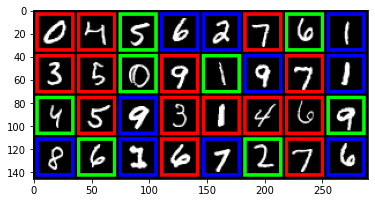

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from col_mnist import ColMNIST

test_loader = torch.utils.data.DataLoader(
  ColMNIST('data/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([#torchvision.transforms.Resize((224, 224)),
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=32, shuffle=True)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
img_shape = images[0].shape
#print(labels)

# Visualizing the reconstruction

In [3]:
import matplotlib.pyplot as plt

def show_reconstruction():
    with torch.no_grad():
        for batch_features in trainer.test_loader:
            batch_features = batch_features[0]
            test_examples = batch_features.view(-1, np.prod(trainer.input_shape)).to(device)
            reconstruction = trainer.model(test_examples).cpu()
            break

    with torch.no_grad():
        number = 10
        plt.figure(figsize=(20, 4))
        for index in range(number):
            # display original
            ax = plt.subplot(2, number, index + 1)
            plt.imshow(np.transpose(test_examples[index].cpu().numpy().reshape(img_shape), (1, 2, 0)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # display reconstruction
            ax = plt.subplot(2, number, index + 1 + number)
            plt.imshow(np.clip(np.transpose(reconstruction[index].numpy().reshape(img_shape), (1, 2, 0)), 0, 1))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()


In [ ]:

show_reconstruction()

In [26]:
ae = trainer.model
w1 = ae.encoder_output_layer.weight.cpu().detach()
w2 = ae.decoder_hidden_layer.weight.cpu().detach()

In [27]:
plt.figure(figsize=(20, 5))
#plt.plot(np.sort(trainer.evec[0].detach().numpy()), label='1')
#plt.plot(np.sort(trainer.evec[1].detach().numpy()), label='2')
#plt.plot(np.sort(trainer.evec[2].detach().numpy()), label='3')
#plt.plot(np.sort(trainer.evec[3].detach().numpy()), label='4')
#plt.plot(np.sort(trainer.evec[4].detach().numpy()), label='5')
#plt.legend()
plt.hist(trainer.evec.detach().numpy().flatten(),bins=1000)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

<Figure size 1440x360 with 0 Axes>

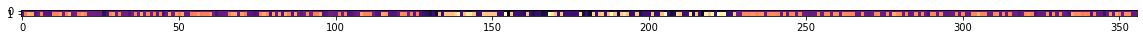

In [43]:
plt.figure(figsize=(20, 20)) 
plt.imshow(trainer.evec[:, :2].detach().cpu().numpy().transpose(), cmap='magma')

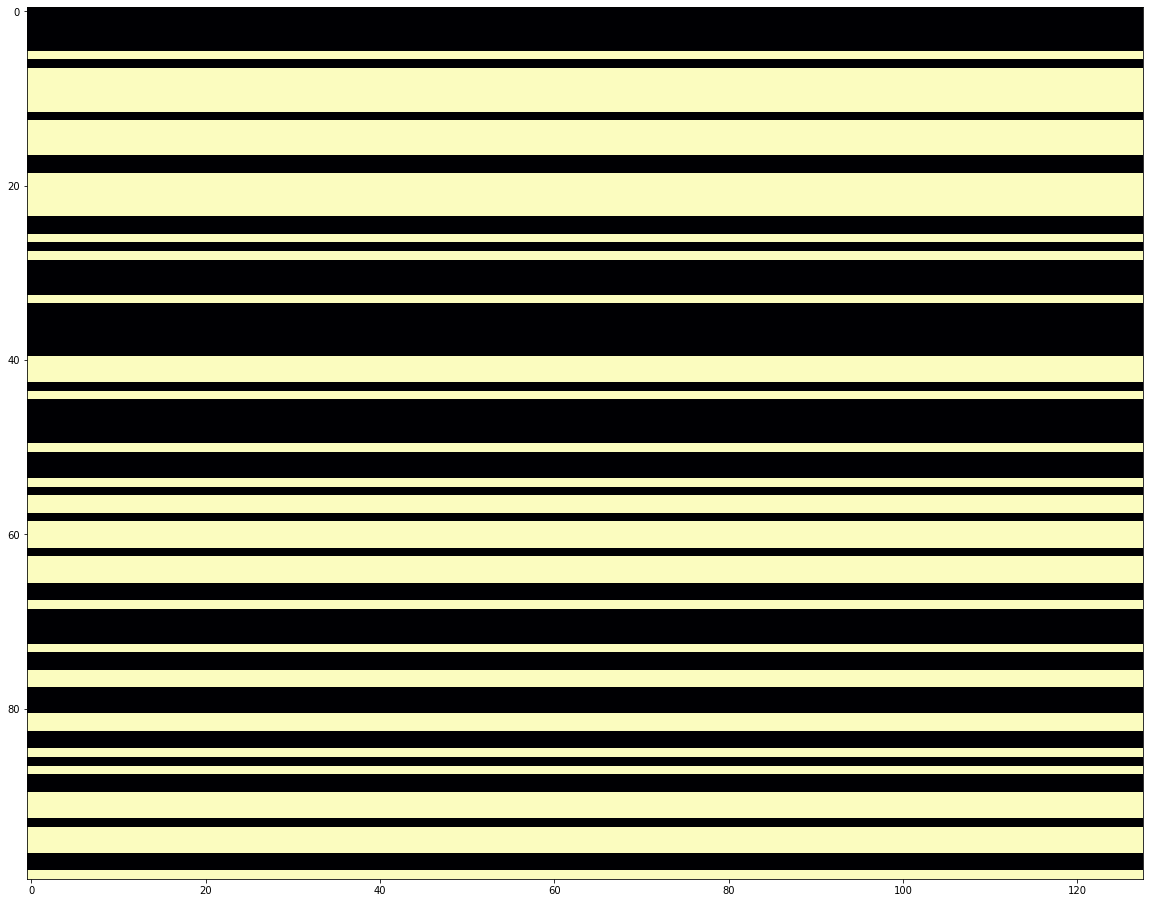

In [77]:
v2 = trainer.evec[:, 1].detach().cpu().numpy()
mask = torch.zeros(w1.shape)
mask.shape
mask[v2[128:228]>0] = 1
plt.figure(figsize=(20, 20)) 
plt.imshow(mask, cmap='magma')

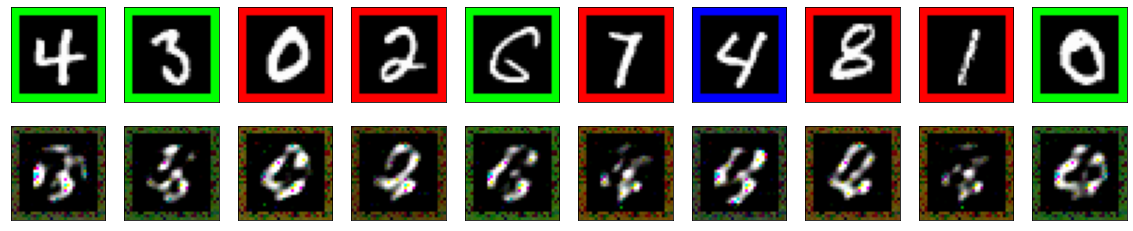

In [78]:
trainer.model.set_mask(mask)
show_reconstruction()

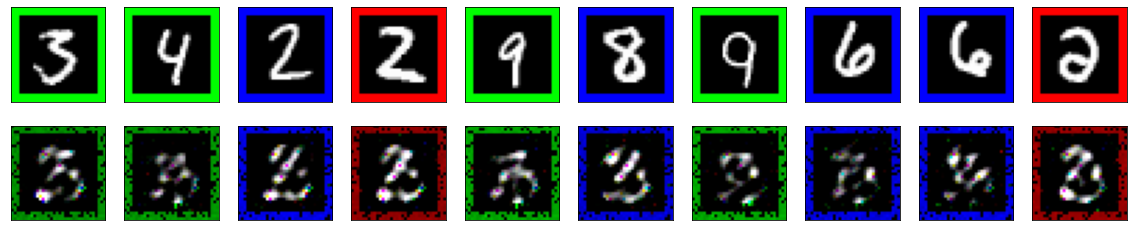

In [79]:
mask = torch.zeros(w1.shape)
mask.shape
mask[v2[128:228]<0] = 1
trainer.model.set_mask(mask)
show_reconstruction()

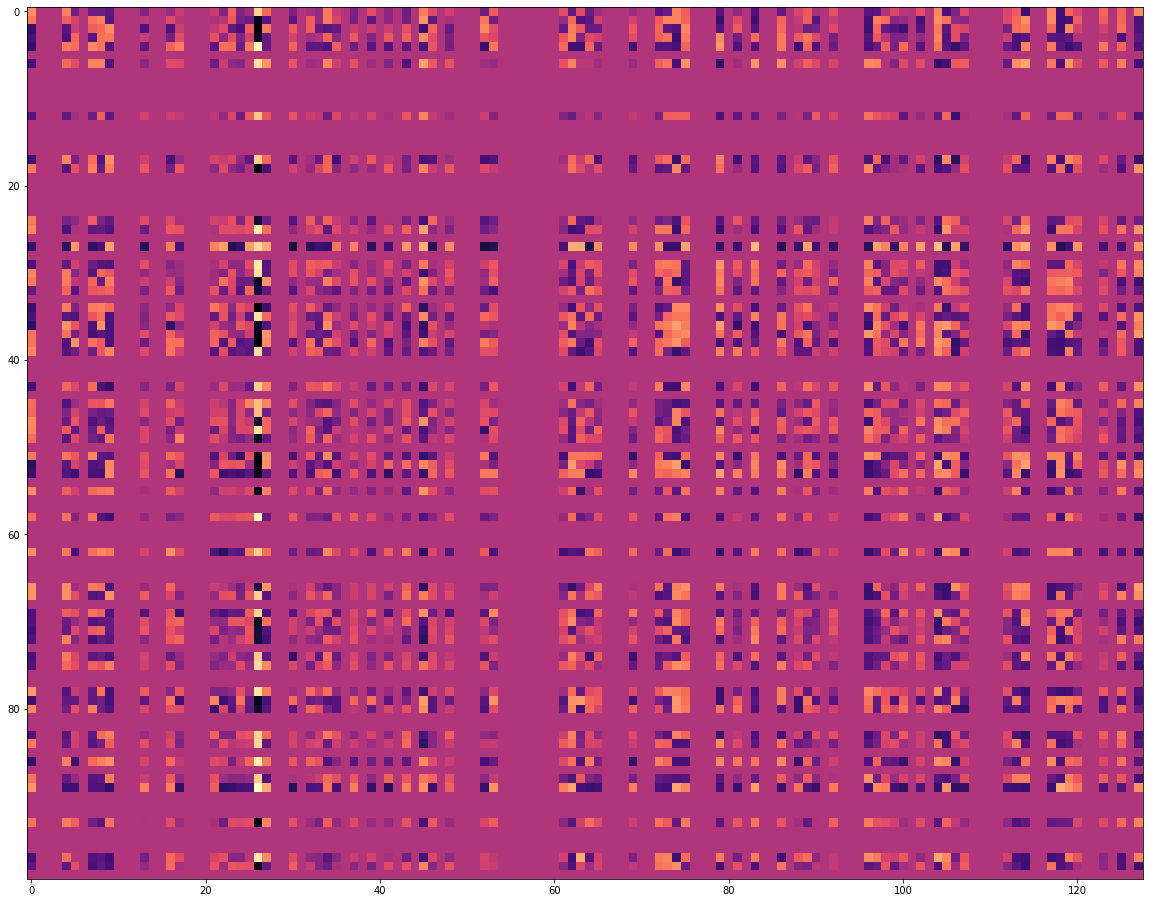

In [53]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1 * mask).cpu().numpy(), cmap='magma')

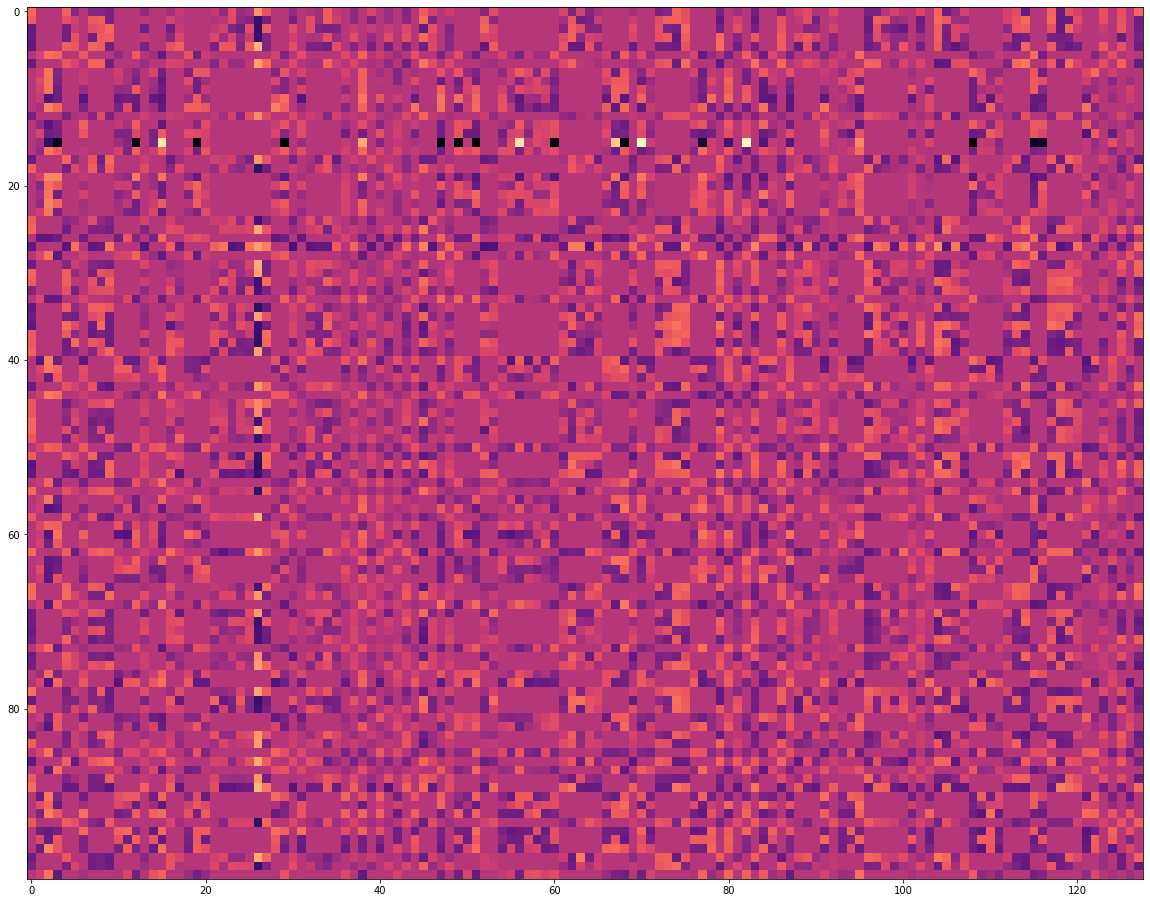

In [54]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

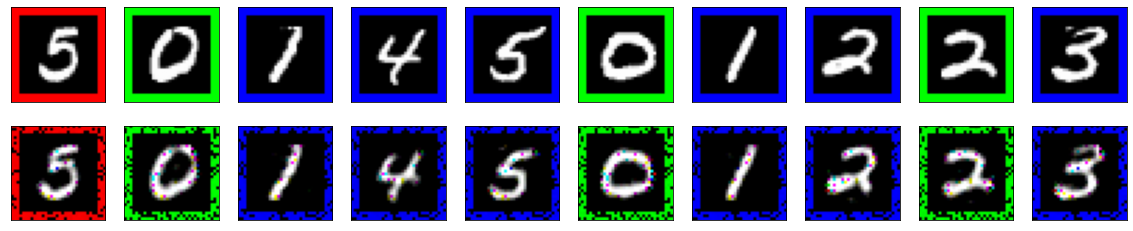

In [55]:
trainer.model.set_mask(None)
show_reconstruction()

# Results of the spectral clustering

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

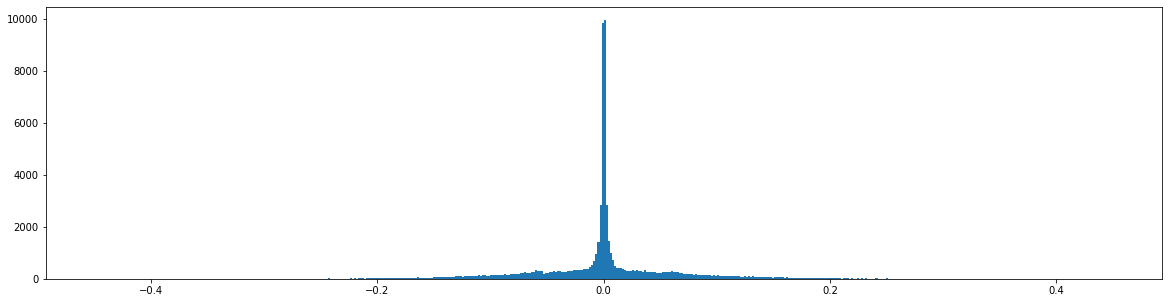

In [32]:
plt.figure(figsize=(20, 5)) 
plt.hist(trainer.evec.detach().numpy().flatten(), bins=500)

In [65]:
srt_enc = np.argsort(v2[:128]).tolist()
srt_hidden = np.argsort(v2[128:228]).tolist()
srt_dec = np.argsort(v2[228:]).tolist()


trainer.model.set_mask(None)

w1 = ae.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]

w2 = ae.decoder_hidden_layer.weight.cpu().detach()
w2 = w2[srt_dec, :]
w2 = w2[:, srt_hidden]

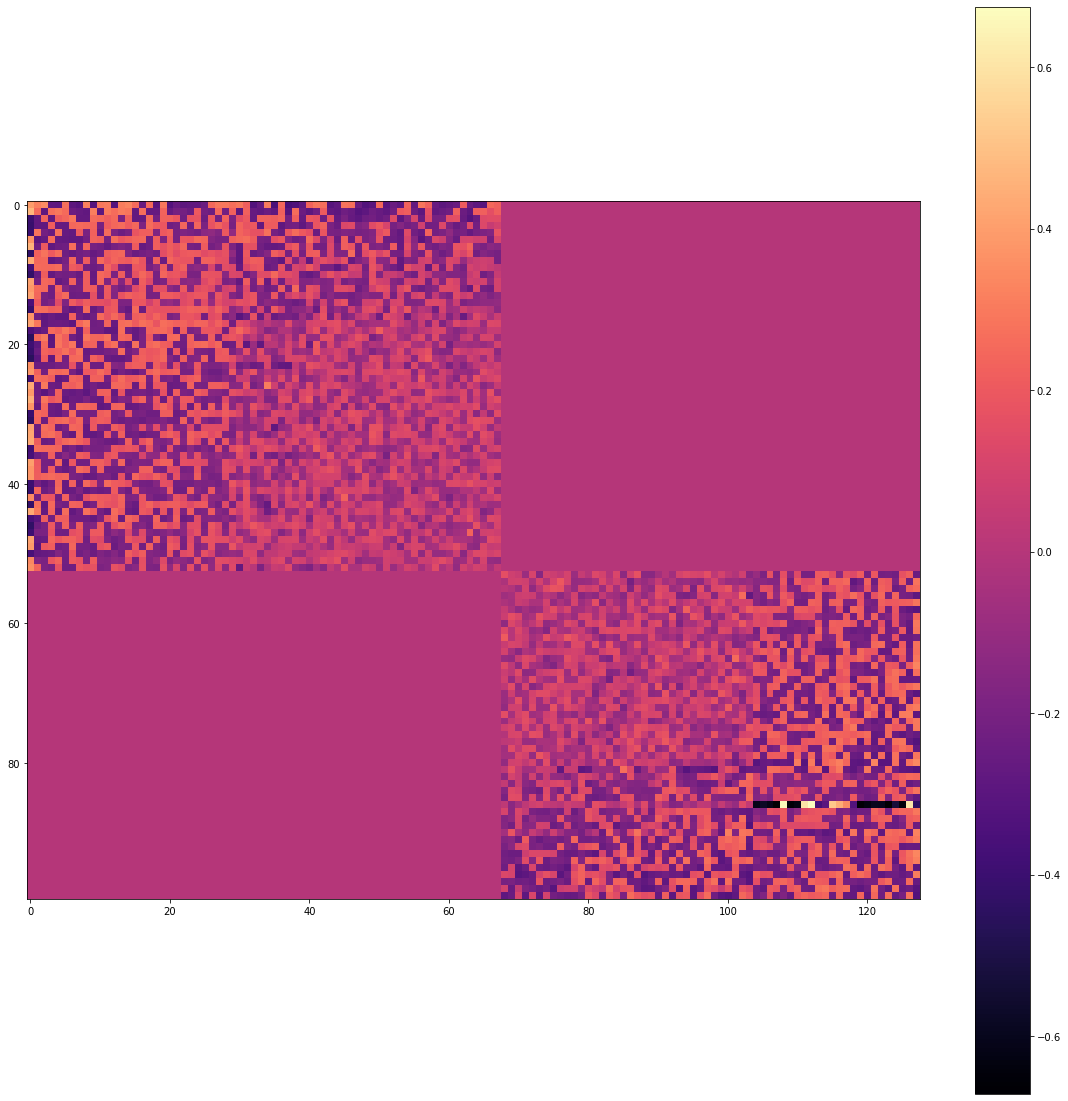

In [81]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')
plt.colorbar()

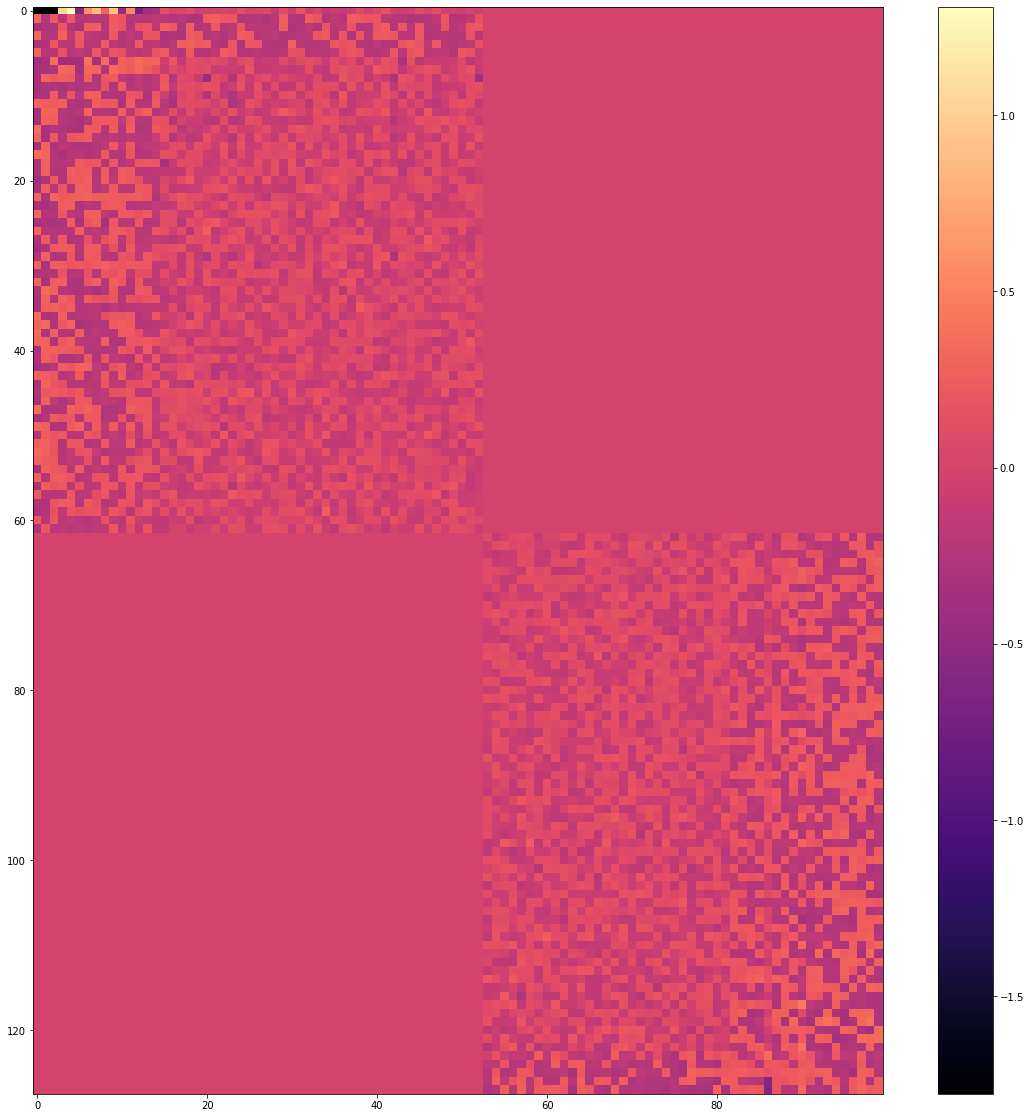

In [83]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w2).cpu().numpy(), cmap='magma')
plt.colorbar()

# More components

In [93]:
%load_ext autoreload
%autoreload 2
%run autoenc_br.py --epochs 2 --connected_components 5
ncc = 5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Batch 1, loss 3.8125669956207275
Batch 101, loss 2.269021269118432
Batch 201, loss 1.4644829387688518
Batch 301, loss 1.0228822658277825
Batch 401, loss 0.7847138128412929
Batch 501, loss 0.6398454509943188
Batch 601, loss 0.5427171158760835
Batch 701, loss 0.4729354735118431
Batch 801, loss 0.4203783636180203
Batch 901, loss 0.37933184490947425
Batch 1001, loss 0.34634909349364357
Batch 1101, loss 0.3192473653260683
Batch 1201, loss 0.2965764731299024
Batch 1301, loss 0.2773208641701254
Batch 1401, loss 0.2607597901215305
Batch 1501, loss 0.2463627245071171
Batch 1601, loss 0.23374867367602972
Batch 1701, loss 0.22256072407598218
Batch 1801, loss 0.212591221970793
Train epoch 1, loss 0.20588127469817796
Batch 1, loss 0.04183714836835861
Batch 101, loss 0.04216685042817994
Batch 201, loss 0.041947469652736956
Batch 301, loss 0.04173040576897982
Batch 401, loss 0.04158565972436991
Batch 501, loss 0.0

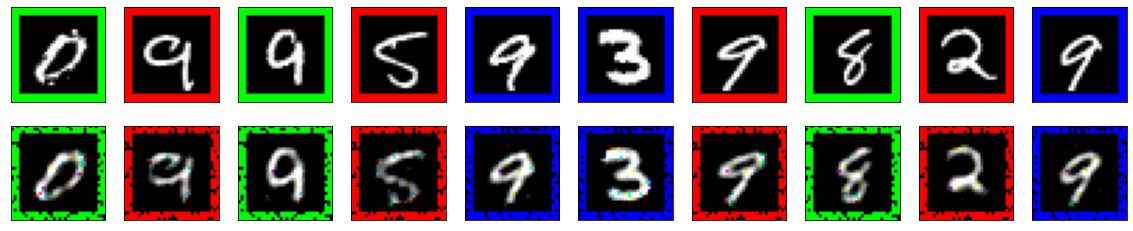

In [94]:
show_reconstruction()

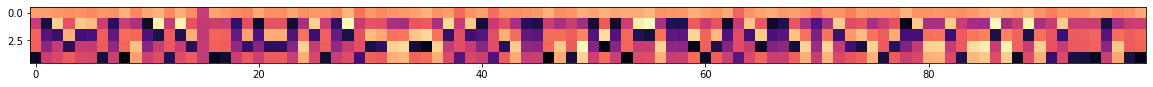

In [95]:
v = trainer.evec[128:228, :ncc].detach().cpu().numpy().transpose(1, 0)
plt.figure(figsize=(20, 20)) 
plt.imshow(v, cmap="magma")

[3 1 3 3 3 3 3 1 3 3 1 3 3 3 3 4 3 3 1 3 1 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 3 1 3 3 3 1 1 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 3 3 3 1 1 3 3 1 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3]


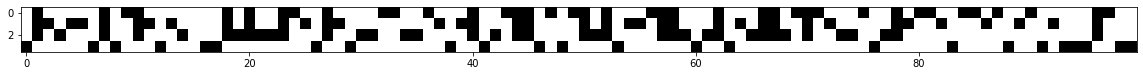

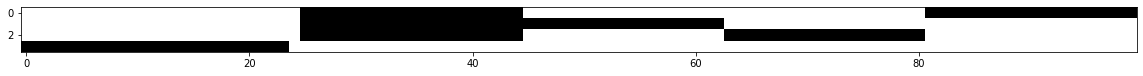

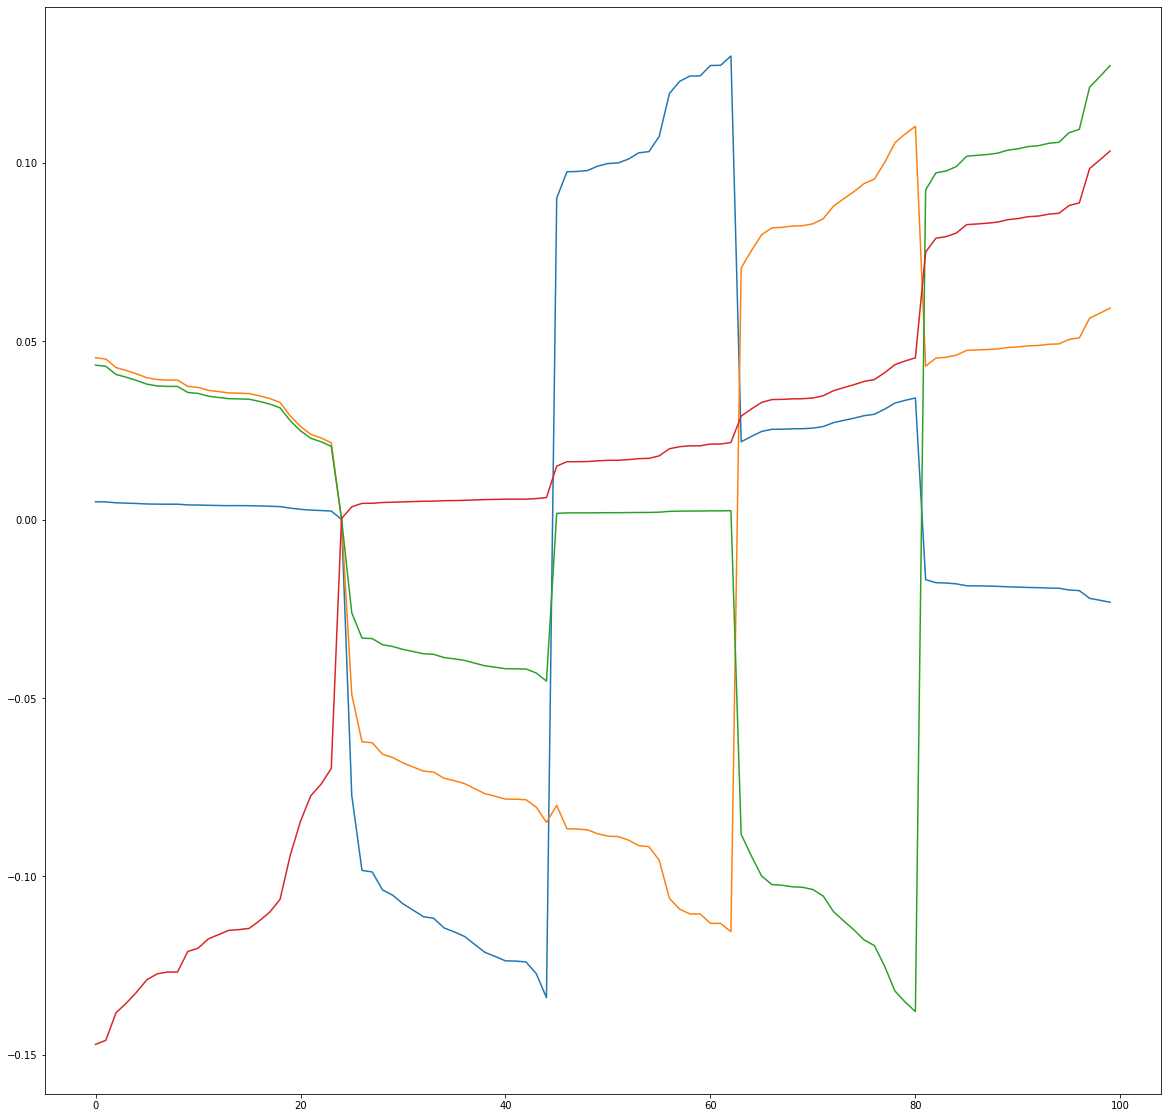

In [96]:
plt.figure(figsize=(20, 20)) 
plt.imshow(v[1:]>0)
plt.figure(figsize=(20, 20)) 
plt.imshow(v[1:, np.argsort(v[ncc-1])]>0)
plt.figure(figsize=(20, 20)) 
plt.plot(v[1:, np.argsort(v[ncc-1])].transpose(1, 0))
print((v[1:]>0).sum(axis=0))

In [97]:
blocks = np.zeros(100, dtype=int)
c = 0
for i in range(1, 100):
    idx = np.argsort(v[ncc-1])[i]
    idx_prev = np.argsort(v[ncc-1])[i-1]
    if ((v[:, idx] > 0) != (v[:, idx_prev]>0)).any():
        c+=1
    blocks[idx] = c
blocks[np.argsort(v[4])]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [98]:
ae = trainer.model

w1 = ae.encoder_output_layer.weight.cpu().detach()
w2 = ae.decoder_hidden_layer.weight.cpu().detach()

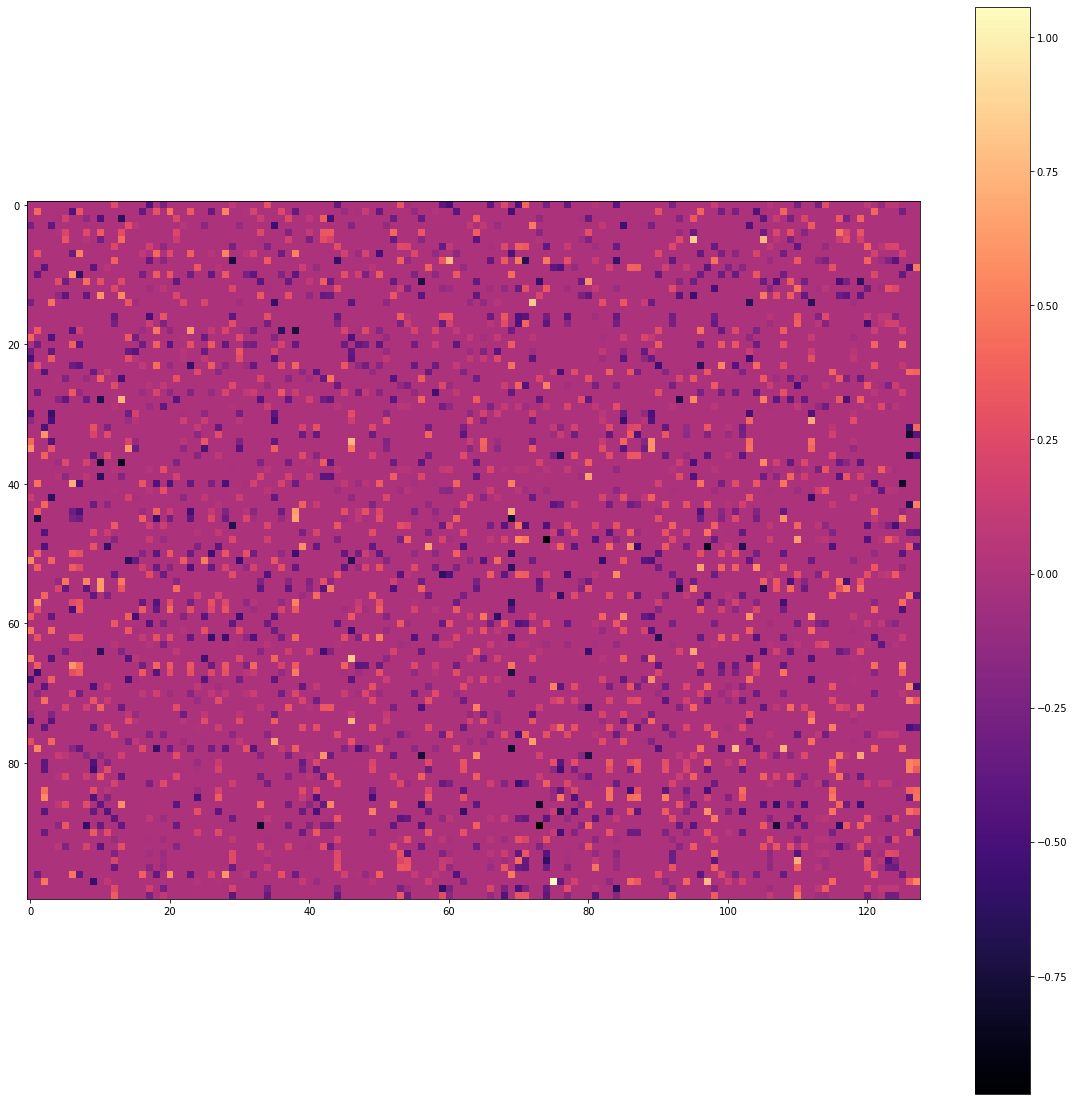

In [99]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')
plt.colorbar()

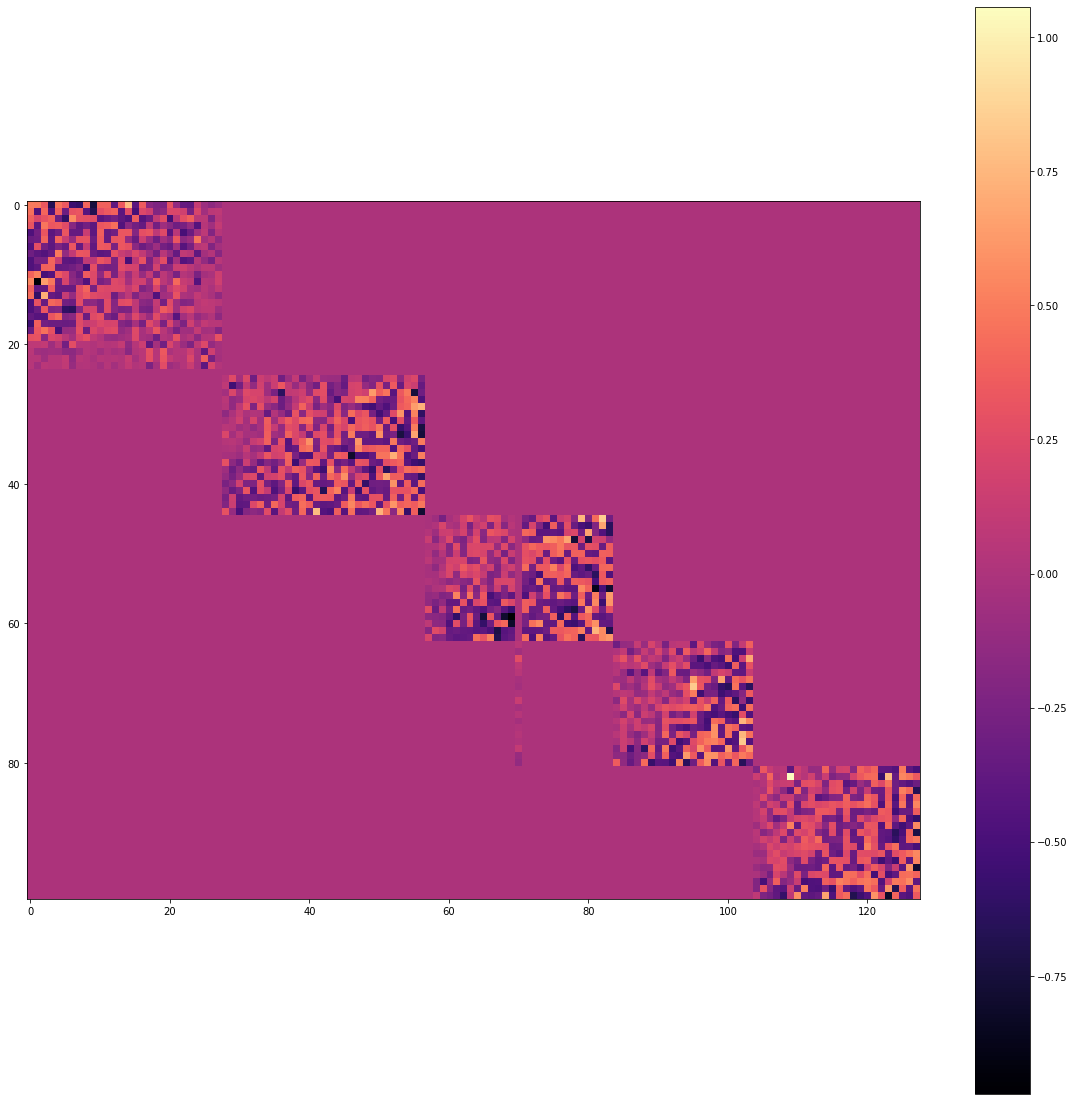

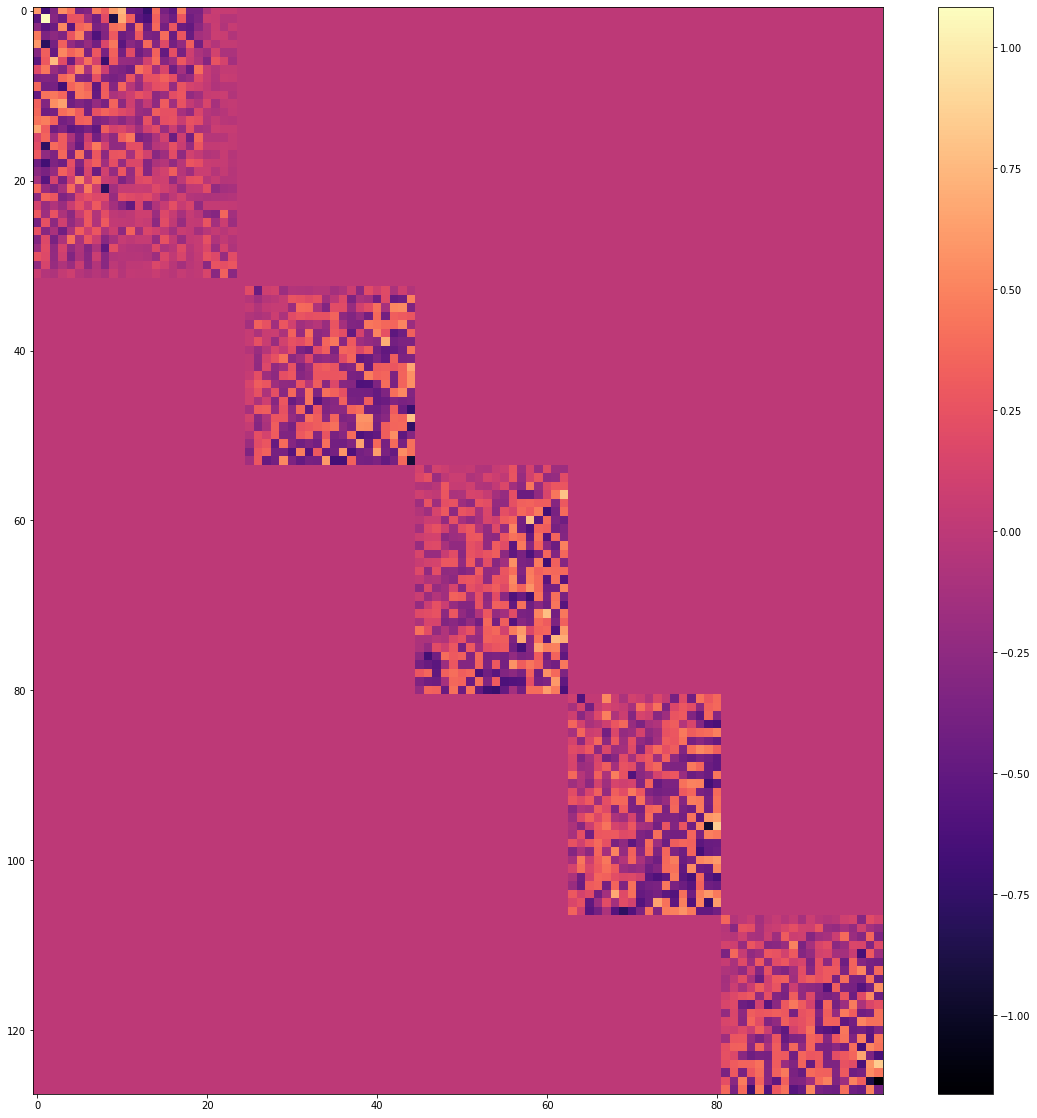

In [100]:
v2 = trainer.evec[:, ncc-1].detach().cpu().numpy()
srt_enc = np.argsort(v2[:128]).tolist()
srt_hidden = np.argsort(v2[128:228]).tolist()
srt_dec = np.argsort(v2[228:]).tolist()


trainer.model.set_mask(None)

w1 = ae.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')
plt.colorbar()

w2 = ae.decoder_hidden_layer.weight.cpu().detach()
w2 = w2[srt_dec, :]
w2 = w2[:, srt_hidden]
plt.figure(figsize=(20, 20)) 
plt.imshow((w2).cpu().numpy(), cmap='magma')
plt.colorbar()

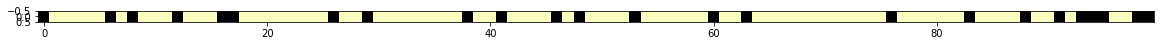

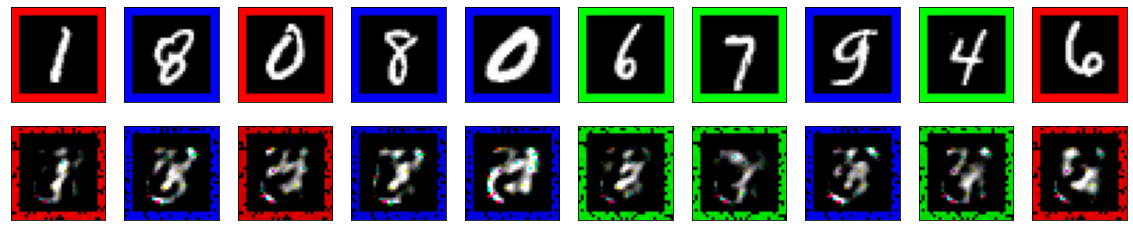

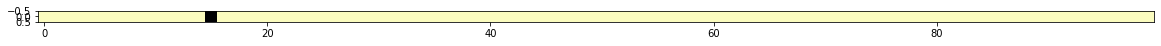

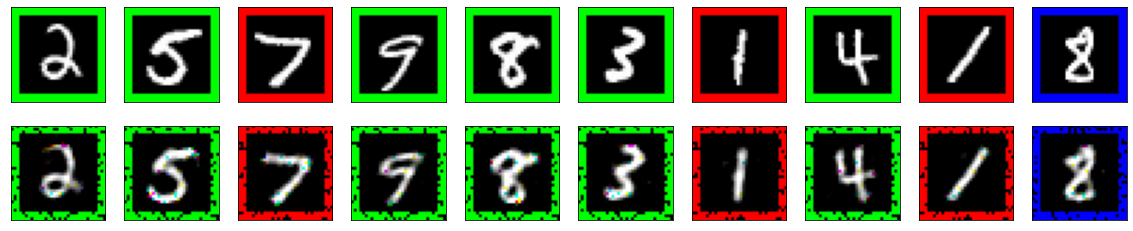

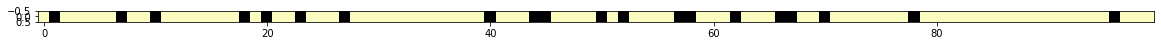

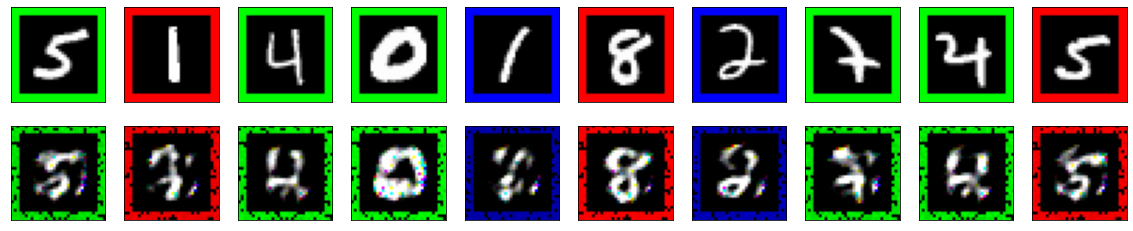

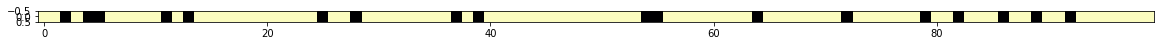

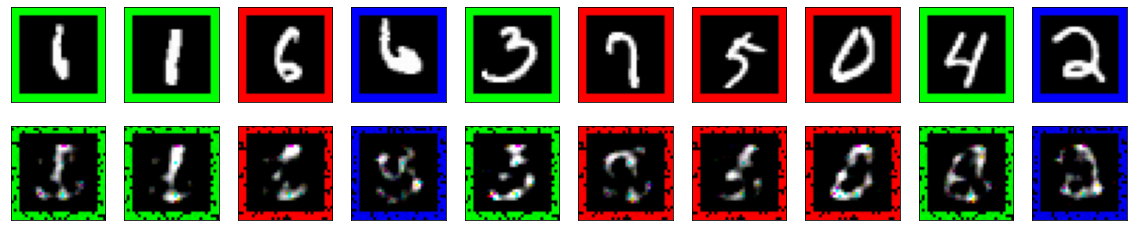

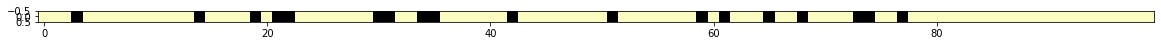

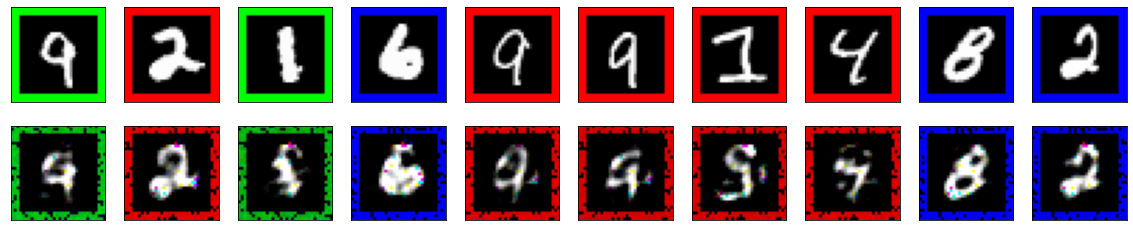

In [102]:
for c in range(ncc):
    mask = torch.ones(w1.shape)
    mask.shape
    mask[blocks==c] = 0
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    show_reconstruction()

# Block regularization minimal example

In [85]:
def laplacian(w):
    m = torch.zeros((sum(w.shape), sum(w.shape)), requires_grad=False)
    m[-w.shape[0]:, :w.shape[1]] = -torch.abs(w)
    m[:w.shape[1]:, -w.shape[0]:] = -torch.abs(w.transpose(-2, -1))
    m -= torch.diag(m.sum(-1))
    return m

In [86]:
w = torch.tensor([[1, 0], [0, 1], [0, 1]], dtype=torch.float, requires_grad=True)
n_conn_comp = 2
e, _ = torch.symeig(laplacian(w), eigenvectors=True)
loss = torch.sum(e[:n_conn_comp])
loss.backward(retain_graph=True)

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(3, 2)

    def forward(self, x):
        x = self.fc(x)
        return x

net = Net()

In [88]:
net.zero_grad()
n_conn_comp = 2
e, _ = torch.symeig(laplacian(net.fc.weight), eigenvectors=True)
loss = torch.sum(e[:n_conn_comp])
loss.backward(retain_graph=True)

In [89]:
net.zero_grad()
n_conn_comp = 2
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

a = torch.randn((100, 3), dtype=torch.float)
b = torch.vstack((a[:, 0]+a[:, 1], a[:, -1])).transpose(1, 0)

for i in range(0, 1):
    net.zero_grad()
    outputs = net(a)
    e, _ = torch.symeig(laplacian(net.fc.weight), eigenvectors=True)
    mse = criterion(outputs, b)
    #reg = torch.sum(e[:n_conn_comp])
    loss =  mse#+reg
    loss.backward(retain_graph=True)
    optimizer.step()
    
print(mse.item())
net.fc.weight

1.5393427610397339


Parameter containing:
tensor([[ 0.0313,  0.1969,  0.5013],
        [-0.0437, -0.4261, -0.2453]], requires_grad=True)

In [90]:

w_history = list()
w = torch.tensor([[1, 1, 0], [0, 0, -1]], dtype=torch.float)
w+=torch.rand(2, 3)/10
                 
net.fc.weight=nn.Parameter(w, requires_grad=True)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.1)

print(w)
for i in range(0, 1000):
    net.zero_grad()
    e, _ = torch.symeig(laplacian(net.fc.weight), eigenvectors=True)
    reg = torch.sum(e[:n_conn_comp])
    loss =  reg
    loss.backward(retain_graph=True)
    optimizer.step()
    w_history.append(net.fc.weight.detach().cpu().flatten().numpy())
    
print(reg.item())
net.fc.weight

tensor([[ 1.0212,  1.0340,  0.0541],
        [ 0.0356,  0.0829, -0.9513]])
0.015231550671160221


Parameter containing:
tensor([[ 1.0211e+00,  1.0338e+00, -1.6459e-03],
        [ 2.3812e-05, -7.4237e-03, -9.5120e-01]], requires_grad=True)

In [91]:
import torch
x = -torch.tensor([[1, 1, 0], [0, 0, 1]], dtype=torch.float)
for i in range(1, 10):
    n = torch.rand(x.shape)/i
    l = laplacian(x+n)
    e, _ = torch.symeig(l)
    print(e, torch.sum(e[:2]))

tensor([-1.4901e-07,  2.3645e-01,  4.9960e-01,  7.1434e-01,  2.0309e+00]) tensor(0.2364)
tensor([2.0117e-07, 7.1958e-01, 8.9442e-01, 1.5968e+00, 2.5833e+00]) tensor(0.7196)
tensor([1.7232e-07, 3.4360e-01, 9.6552e-01, 2.1054e+00, 2.6288e+00]) tensor(0.3436)
tensor([-5.4125e-08,  4.7009e-01,  1.0495e+00,  1.8181e+00,  2.9342e+00]) tensor(0.4701)
tensor([-4.5850e-08,  1.4127e-01,  9.5742e-01,  2.0768e+00,  2.7474e+00]) tensor(0.1413)
tensor([5.5487e-07, 2.0073e-01, 1.0037e+00, 2.0909e+00, 2.9487e+00]) tensor(0.2007)
tensor([2.3808e-07, 1.3679e-01, 1.0329e+00, 1.9128e+00, 3.0317e+00]) tensor(0.1368)
tensor([1.7928e-08, 1.6262e-01, 1.0304e+00, 1.9132e+00, 2.8608e+00]) tensor(0.1626)
tensor([-2.6451e-08,  8.2599e-02,  9.5555e-01,  1.9677e+00,  2.8805e+00]) tensor(0.0826)


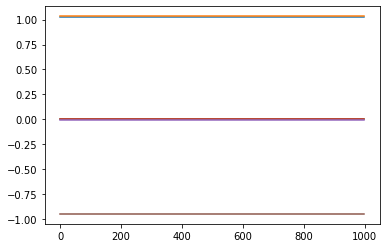

In [92]:
import matplotlib.pyplot as plt

plt.plot(np.array(w_history))
plt.show()